## ML project on real estate house price prediction

Importing required libraries

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
%matplotlib inline

## Loading data

- Data downloaded from https://www.kaggle.com/datasets/amitabhajoy/bengaluru-house-price-data

In [18]:
df1 = pd.read_csv('Bengaluru_House_Data.csv')
df1

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00
...,...,...,...,...,...,...,...,...,...
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.00
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.00
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.00
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.00


## Data visualization and Cleaning the data 

In [19]:
df1.shape

(13320, 9)

Given data has total of 9 different features(columns) and 13320 house prices data(rows).

In [20]:
df1.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


There are average of 2 bathrooms and 1 balcony for a house of average price 112 lakhs.
- Maximum price value of a house is 3600 Lakhs and minimum of 8 lakhs.


In [21]:
df1.groupby('area_type')['area_type'].count()

area_type
Built-up  Area          2418
Carpet  Area              87
Plot  Area              2025
Super built-up  Area    8790
Name: area_type, dtype: int64

In [23]:
df2 = df1.drop(['area_type', 'availability', 'society', 'balcony'], axis = 'columns')
df2.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [26]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

Above section is showing the number of null values in each column.

we can safely drop the null values as they are less in number compared to the original data


In [27]:
df3 = df2.dropna()

In [28]:
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [29]:
df3.shape

(13246, 5)

In [31]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In the above section, we can see there is repetition of data. For e.g, 3rd value which is 3 BHK and 6th value 3 Bedroom are same. Hence we need to consider that as well.

So we will create a new column 'bhk' consisting number of bedrooms

In [32]:
df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))

C:\Users\Nani\AppData\Local\Temp\ipykernel_25580\2773794992.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df3['bhk'] = df3['size'].apply(lambda x: int(x.split(" ")[0]))


In [33]:
df3.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


**Bedroom outlier**

In [35]:
df3['bhk'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18], dtype=int64)

In [36]:
df3[df3['bhk'] > 20]

,location,size,total_sqft,bath,price,bhk
1718,2Electronic City Phase II,27 BHK,8000,27.0,230.0,27
4684,Munnekollal,43 Bedroom,2400,40.0,660.0,43


In [37]:
df3.total_sqft.unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In the above section, we can there is a range of data provided instead of single value for total_sqft. Hence take the mean of them and the ones with their units metioned are droped(They don't affect the model as they were less in number)

In [38]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [45]:
df3[~(df3['total_sqft'].apply(is_float))].head(6)

,location,size,total_sqft,bath,price,bhk
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
410,Kengeri,1 BHK,34.46Sq. Meter,1.0,18.500,1


In [56]:
def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens)==2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None
    

In [57]:
convert_sqft_to_num('2100 - 2850')

2475.0

In [59]:
df4 = df3.copy()
df4['total_sqft'] = df4['total_sqft'].apply(convert_sqft_to_num)
df4.head()

,location,size,total_sqft,bath,price,bhk
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [62]:
df4.loc[30]

location      Yelahanka
size              4 BHK
total_sqft       2475.0
bath                4.0
price             186.0
bhk                   4
Name: 30, dtype: object

In [61]:
df5 = df4.drop('size', axis = 'columns')
df5.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


In [90]:
df6 = df5.copy()
df6.head()

,location,total_sqft,bath,price,bhk
0,Electronic City Phase II,1056.0,2.0,39.07,2
1,Chikka Tirupathi,2600.0,5.0,120.00,4
2,Uttarahalli,1440.0,2.0,62.00,3
3,Lingadheeranahalli,1521.0,3.0,95.00,3
4,Kothanur,1200.0,2.0,51.00,2


### adding price per square feet column

We often consider `price per sq.ft` in comparing the prices.
Hence let's add this column to the data.

In [91]:
df6['price_per_sqft'] = df6['price']*100000 / df6['total_sqft']

In [92]:
df6.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000


**Data cleaning for location column**

In [93]:
len(df6.location.unique())

1304

In [94]:
df6.location = df6.location.apply(lambda x: x.strip())


In [95]:
location_stats = df6.groupby('location')['location'].count().sort_values(ascending = False)
location_stats

location
Whitefield               535
Sarjapur  Road           392
Electronic City          304
Kanakpura Road           266
Thanisandra              236
                        ... 
1 Giri Nagar               1
Kanakapura Road,           1
Kanakapura main  Road      1
Karnataka Shabarimala      1
whitefiled                 1
Name: location, Length: 1293, dtype: int64

In [96]:
len(location_stats[location_stats<=10])

1052

In [97]:
location_stats_less_than10 = location_stats[location_stats<=10]
location_stats_less_than10

location
Basapura                 10
1st Block Koramangala    10
Gunjur Palya             10
Kalkere                  10
Sector 1 HSR Layout      10
                         ..
1 Giri Nagar              1
Kanakapura Road,          1
Kanakapura main  Road     1
Karnataka Shabarimala     1
whitefiled                1
Name: location, Length: 1052, dtype: int64

In [98]:
len(df6.location.unique())

1293

In [99]:
df6.location = df6.location.apply(lambda x: 'other' if x in location_stats_less_than10 else x)
len(df6.location.unique())

242

In [182]:
df6.head(10)

,location,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,1056.0,2.0,39.07,2,3699.810606
1,Chikka Tirupathi,2600.0,5.0,120.00,4,4615.384615
2,Uttarahalli,1440.0,2.0,62.00,3,4305.555556
3,Lingadheeranahalli,1521.0,3.0,95.00,3,6245.890861
4,Kothanur,1200.0,2.0,51.00,2,4250.000000
5,Whitefield,1170.0,2.0,38.00,2,3247.863248
6,Old Airport Road,2732.0,4.0,204.00,4,7467.057101
7,Rajaji Nagar,3300.0,4.0,600.00,4,18181.818182
8,Marathahalli,1310.0,3.0,63.25,3,4828.244275
9,other,1020.0,6.0,370.00,6,36274.509804


In [183]:
df6[df6.total_sqft / df6.bhk <300].head() #unusual, data errors

,location,total_sqft,bath,price,bhk,price_per_sqft
9,other,1020.0,6.0,370.0,6,36274.509804
45,HSR Layout,600.0,9.0,200.0,8,33333.333333
58,Murugeshpalya,1407.0,4.0,150.0,6,10660.980810
68,Devarachikkanahalli,1350.0,7.0,85.0,8,6296.296296
70,other,500.0,3.0,100.0,3,20000.000000


In [184]:
df7 = df6[~(df6.total_sqft / df6.bhk <300)]
df7.shape

(12502, 6)

In [185]:
df7.price_per_sqft.describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price_per_sqft, dtype: float64

**Removing outliers based on price per sqft**

In [186]:
def remove_pps_outlier(df):
    df_out = pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m = np.mean(subdf.price_per_sqft)
        st = np.std(subdf.price_per_sqft)
        reduced_df = subdf[(subdf.price_per_sqft >(m-st)) & (subdf.price_per_sqft <(m+st))]
        df_out = pd.concat([df_out, reduced_df], ignore_index = True)
    return df_out
df8 = remove_pps_outlier(df7)
df8.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


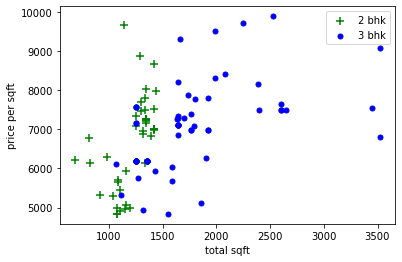

In [187]:
def plot_scatter_chart(df, location):
    bhk2 = df[(df.bhk ==2) & (df.location == location)]
    bhk3 = df8[(df.bhk ==3) & (df.location == location)]
    plt.scatter(bhk2.total_sqft, bhk2.price_per_sqft, color='green', marker = '+', s = 50, label= '2 bhk')
    plt.scatter(bhk3.total_sqft, bhk3.price_per_sqft, color = 'blue', s = 25, label = '3 bhk')
    plt.legend()
    plt.xlabel('total sqft')
    plt.ylabel('price per sqft')
    
plot_scatter_chart(df8, 'Hebbal')

for total area of 1300 sqft, 2 bedroom house is more costlier than 3 bedroom house which is unusal. Hence we need to remove those as they can disturb the model accuracy.

We should also remove properties where for same location, the price of(for example) 3 bedroom apartment is less than 2 bedroom apartment(with same sqft area).What we will do for a given location, we will build a dictionary of stats per bhk, i.e.,

    {
        '1':{
            'mean': 4000,
            'std' : 2000,
            'count': 34
        },
        '2' :{
            'mean' : 4300,
            'std' : 2300,
            'count' = 22
        },
     }
     
Now we can remove those 2 bhk apartments whose price_per_sqft is less than mean price_per_sqft of 2 bhk apartments.

In [188]:
def remove_bhk_outliers(df):
    exclude_indices= np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats = {}
        for bhk, bhk_df in location_df.groupby('bhk'):
            bhk_stats[bhk] = {
                'mean': np.mean(bhk_df.price_per_sqft),
                'std': np.std(bhk_df.price_per_sqft),
                'count': bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('bhk'):
            stats = bhk_stats.get(bhk - 1)
            if stats and stats['count'] >5:
                exclude_indices = np.append(exclude_indices, bhk_df[bhk_df.price_per_sqft < (stats['mean'])].index.values)
    return df.drop(exclude_indices, axis = 'index')            

In [189]:
df9 = remove_bhk_outliers(df8)
df9.shape

(7329, 6)

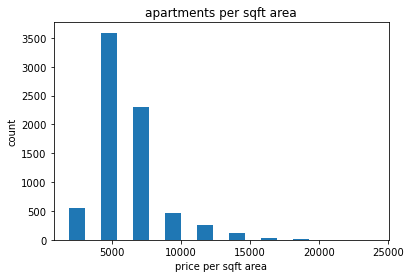

In [190]:
plt.hist(df9.price_per_sqft, rwidth= 0.5)
plt.title('apartments per sqft area')
plt.xlabel('price per sqft area')
plt.ylabel('count');

2 bathroom apartments are high in number followed by 3 bathroom apartments.

BATHROOM OUTLIER:

Anytime we a have apartment with bathroom count greater than (number of bedrooms +2) then it will be a outlier.

In [191]:
df9.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [192]:
df9.bath.unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [193]:
df9[df9.bath >=10]

,location,total_sqft,bath,price,bhk,price_per_sqft
5277,Neeladri Nagar,4000.0,12.0,160.0,10,4000.000000
8486,other,12000.0,12.0,525.0,10,4375.000000
8575,other,10000.0,16.0,550.0,16,5500.000000
9308,other,6000.0,12.0,150.0,11,2500.000000
9639,other,5425.0,13.0,275.0,13,5069.124424


Here we can see 

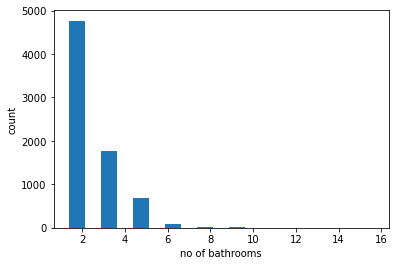

In [194]:
plt.hist(df9.bath, rwidth = 0.5)
plt.xlabel('no of bathrooms')
plt.ylabel('count');

2 bathroom apartments are high in number followed by 3 bathroom apartments.

**BATHROOM OUTLIER:**

Anytime we a have apartment with bathroom count greater than (number of bedrooms +2) then it will be a outlier.

In [195]:
df10 = df9[df9.bath < df9.bhk+2]
df10.shape

(7251, 6)

In [196]:
df10.head()

,location,total_sqft,bath,price,bhk,price_per_sqft
0,1st Block Jayanagar,2850.0,4.0,428.0,4,15017.543860
1,1st Block Jayanagar,1630.0,3.0,194.0,3,11901.840491
2,1st Block Jayanagar,1875.0,2.0,235.0,3,12533.333333
3,1st Block Jayanagar,1200.0,2.0,130.0,3,10833.333333
4,1st Block Jayanagar,1235.0,2.0,148.0,2,11983.805668


In [213]:
df11 = df10.drop('price_per_sqft', axis = 'columns')
df11.head()

,location,total_sqft,bath,price,bhk
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


location column has text which a categorical info, we need to convert it into a numerical info using OneHotEncoding

In [207]:
dummies = pd.get_dummies(df11.location)
dummies.head()

,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,8th Phase JP Nagar,9th Phase JP Nagar,...,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur,other
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [208]:
df12 = pd.concat([df11, dummies.drop('other', axis = 'columns')], axis = 'columns')
df12.head()

,location,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,1st Block Jayanagar,2850.0,4.0,428.0,4,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1st Block Jayanagar,1630.0,3.0,194.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1st Block Jayanagar,1875.0,2.0,235.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1st Block Jayanagar,1200.0,2.0,130.0,3,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1st Block Jayanagar,1235.0,2.0,148.0,2,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [209]:
df12.shape

(7251, 246)

In [210]:
df13 = df12.drop('location', axis = 'columns')
df13.head()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [211]:
df13.shape

(7251, 245)

In [212]:
df13.describe()

,total_sqft,bath,price,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
count,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000,7251.00000,...,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000,7251.000000,7251.00000,7251.000000,7251.000000
mean,1470.453123,2.413046,96.506118,2.484209,0.000965,0.002207,0.001103,0.000552,0.000827,0.00331,...,0.003999,0.000552,0.000552,0.004275,0.032823,0.001517,0.011860,0.00331,0.001103,0.005103
std,815.018423,0.938519,87.674725,0.911153,0.031058,0.046926,0.033200,0.023482,0.028756,0.05744,...,0.063119,0.023482,0.023482,0.065250,0.178186,0.038922,0.108265,0.05744,0.033200,0.071256
min,300.000000,1.000000,10.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1092.000000,2.000000,50.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,1255.000000,2.000000,72.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
75%,1654.000000,3.000000,110.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
max,30000.000000,16.000000,2200.000000,16.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [243]:
x = df13.drop('price', axis = 'columns')
x.head(3)

,total_sqft,bath,bhk,1st Block Jayanagar,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [244]:
y = df13.price
y.head()

0    428.0
1    194.0
2    235.0
3    130.0
4    148.0
Name: price, dtype: float64

In [245]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state= 10)

In [246]:
from sklearn.linear_model import LinearRegression
lr_model = LinearRegression()
lr_model.fit(x_train, y_train)
lr_model.score(x_test, y_test)

0.845227769787429

In [251]:
from sklearn.tree import DecisionTreeRegressor
ds_model = DecisionTreeRegressor()
ds_model.fit(x_train, y_train)
ds_model.score(x_test, y_test)

0.7114060815161936

In [221]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)

cross_val_score(LinearRegression(), x, y, cv=cv)

array([0.82430186, 0.77166234, 0.85089567, 0.80837764, 0.83653286])

In [276]:
algos = {
        'LinearRegression' : {
            'model': LinearRegression()
        },
        'lasso': {
            'model': Lasso()
        },
        'decision_tree': {
            'model' : DecisionTreeRegressor()
        }
    }
for algo_name, config in algos.items():
    print(config['model'])

LinearRegression()
Lasso()
DecisionTreeRegressor()


In [272]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

In [277]:
cv = ShuffleSplit(n_splits = 5, test_size = 0.2, random_state = 0)
for algo_name, config in algos.items():
    clf = GridSearchCV(config['model'], cv = cv, return_train_score=False)
    clf.fit(x,y)
    clf.best_score_
    print(algo_name, ' has a score of ', clf.best_score_)

TypeError: __init__() missing 1 required positional argument: 'param_grid'

In [223]:
x.columns

Index(['total_sqft', 'bath', 'bhk', '1st Block Jayanagar',
       '1st Phase JP Nagar', '2nd Phase Judicial Layout',
       '2nd Stage Nagarbhavi', '5th Block Hbr Layout', '5th Phase JP Nagar',
       '6th Phase JP Nagar',
       ...
       'Vijayanagar', 'Vishveshwarya Layout', 'Vishwapriya Layout',
       'Vittasandra', 'Whitefield', 'Yelachenahalli', 'Yelahanka',
       'Yelahanka New Town', 'Yelenahalli', 'Yeshwanthpur'],
      dtype='object', length=244)

In [230]:
np.where(x.columns == '1st Block Jayanagar')[0]

array([3], dtype=int64)

In [231]:
def predict_price(location, sqft, bath, bhk):
    loc_index = np.where(x.columns == location)[0][0]
    
    m = np.zeros(len(x.columns))
    m[0] = sqft
    m[1] = bath
    m[2] = bhk
    if loc_index >=0:
        m[loc_index] = 1
        
    return lr_model.predict([m])[0]

In [233]:
predict_price('1st Phase JP Nagar', 1000, 2,2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


83.49904677172415

In [234]:
predict_price('1st Phase JP Nagar', 1000, 3,3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


86.80519395199

In [235]:
predict_price('Indira Nagar', 1000, 3,3)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


184.58430202033549

In [236]:
predict_price('Indira Nagar', 1000, 2,2)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


181.27815484006965

In [237]:
predict_price('Indira Nagar', 1000, 2,4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


177.73239931157804

In [241]:
predict_price('Indira Nagar', 1000, 3,4)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


182.81142425608965

**saving model using pickle**

In [278]:
import pickle
with open('banglore_home_prices_model.pickle', 'wb') as f:
    pickle.dump(lr_model, f)